## Iris Erkrankungen aus OCT scans

In [1]:
################################################################################################### 

import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
###################################################################################################    

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
################################################################################################### 
import matplotlib.cm as cm
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((24,24)), cmap=cm.Greys, interpolation='nearest')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
################################################################################################### 

In [2]:
from keras import backend as K

Using TensorFlow backend.


In [3]:
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import pandas
import h5py
import imageio
import os
from skimage.transform import resize

In [4]:
from tqdm import tqdm

img_rows, img_cols = 500, 500
np.random.seed(1338)  # for reproducibilty

FOLDER_small = "OCT2017/train/very_small/"


def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['NORMAL']:
                label = 0
            elif folderName in ['CNV']:
                label = 1
            elif folderName in ['DME']:
                label = 2
            elif folderName in ['DRUSEN']:
                label = 3
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = imageio.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = resize(img_file, (img_rows, img_cols))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y





# for file in os.listdir(DME_dir):
#     if file.endswith('.jpeg'):
#         picture = os.path.join(DME_dir, file)
#         im = imageio.imread(picture)
#         DME_train.append(im)
        
# for file in os.listdir(CNV_dir):
#     if file.endswith('.jpeg'):
#         picture = os.path.join(CNV_dir, file)
#         im = imageio.imread(picture)
#         CNV_train.append(im)
    
# for file in os.listdir(DRUSEN_dir):
#     if file.endswith('.jpeg'):
#         picture = os.path.join(DRUSEN_dir, file)
#         im = imageio.imread(picture)
#         DRUSEN_train.append(im)
        
# for file in os.listdir(NORMAL_dir):
#     if file.endswith('.jpeg'):
#         picture = os.path.join(NORMAL_dir, file)
#         im = imageio.imread(picture)
#         NORMAL_train.append(im)

In [5]:
data, labels = get_data(FOLDER_small)

  0%|          | 0/20 [00:00<?, ?it/s]/home/kevin/.local/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 20/20 [00:02<00:00,  7.52it/s]


In [6]:
def label_2_name(x):
    names = ["Normal", "CNV", "DME", "DRUSEN"]
    return names[x]

Daten:  (40, 500, 500)
Label:  (40,)


Text(0.5,1,'DME')

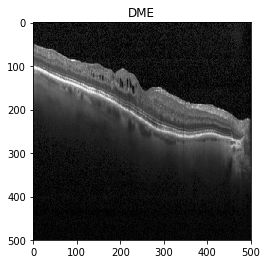

In [7]:
print("Daten: ", data.shape)
print("Label: ", labels.shape)
plt.imshow(data[2], cmap='Greys_r')
plt.title(label_2_name(labels[2]))

In [8]:
def label_2_name(x):
    names = ["Normal", "CNV", "DME", "DRUSEN"]
    return names[x]

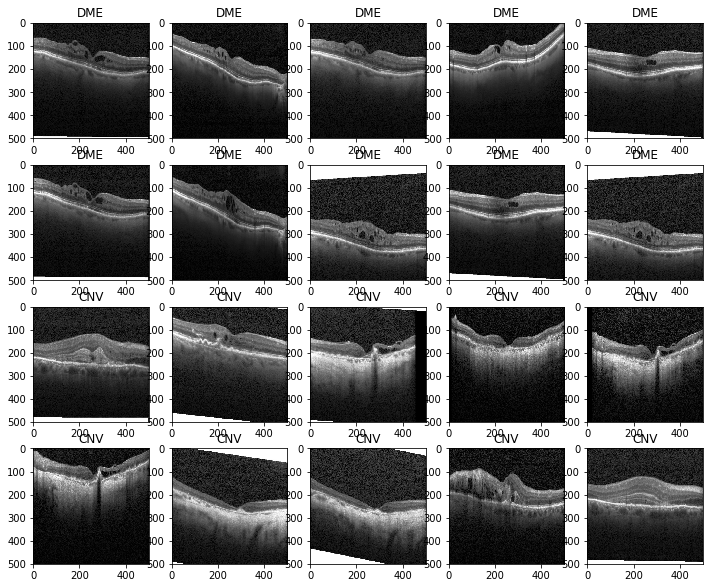

In [9]:
plt.figure(figsize=(12,10))
x, y = 5, 4
for i in range(x*y):
    plt.subplot(y, x, i+1)
    plt.title(label_2_name(labels[i*2]))
    plt.imshow(data[i*2], cmap='Greys_r')
plt.show()

In [11]:
X_train, X_test = train_test_split(data[:],
                                    test_size=0.3,
                                    train_size=0.7,
                                    shuffle=True)
 
Y_train, Y_test = train_test_split(labels[:],
                                    test_size=0.3,
                                    train_size=0.7,
                                    shuffle=True)
print('''
    Datensätze:
    ------------------------------------
    \t \t train \t test \t shape
    Data:\t {} \t {} \t {}
    Labels: \t {} \t {} \t {}
    
'''.format(len(X_train), len(X_test), X_train.shape, len(Y_train), len(Y_test), Y_train.shape))


    Datensätze:
    ------------------------------------
    	 	 train 	 test 	 shape
    Data:	 28 	 12 	 (28, 500, 500)
    Labels: 	 28 	 12 	 (28,)
    



In [12]:
X_train = X_train.reshape(len(X_train), 500**2)
X_test = X_test.reshape(len(X_test), 500**2)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

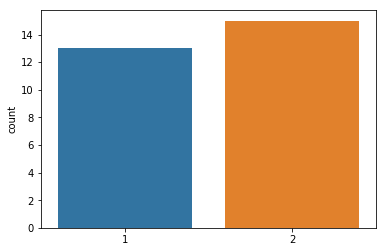

In [14]:
import seaborn as sns
cp = sns.countplot(Y_train)
fig = cp.get_figure()
fig.savefig('countplot.pdf')

In [15]:
if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

In [16]:
print(Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, 4)
Y_test = np_utils.to_categorical(Y_test, 4)

print(Y_train.shape)
print(Y_train[1])

(28,)
(28, 4)
[ 0.  1.  0.  0.]


Split test and validation data

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train,
                                                  Y_train,
                                                  test_size=0.3, stratify=Y_train)
print('''
    \t\t Y \t\t X
    ---------------------------------------------------------------
    train|\t {} \t {}
    test |\t {} \t {}
'''.format(Y_train.shape, X_train.shape, Y_test.shape, X_test.shape))


    		 Y 		 X
    ---------------------------------------------------------------
    train|	 (19, 4) 	 (19, 500, 500, 1)
    test |	 (12, 4) 	 (12, 500, 500, 1)



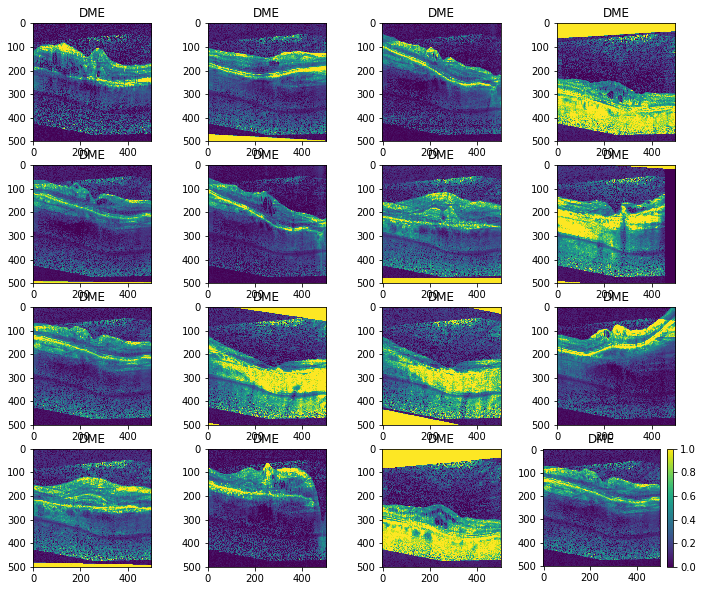

In [26]:
# plt.imshow(X_train[].reshape(500, 500))
plt.figure(figsize=(12,10))
x, y = 4, 4
for i in range(x*y):
    plt.subplot(y, x, i+1)
    plt.title(label_2_name(labels[i]))
    plt.imshow(X_train[i].reshape(500, 500))#, cmap='Greys_r')
plt.colorbar()
plt.show()

## Build and train a neural network

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

# Define Model

In [28]:
# -- Initializing the values for the convolution neural network

nb_epoch = 5  # kept very low! 

batch_size = 20
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [31]:
model = Sequential()

model.add(Conv2D(nb_filters, kernel_size=(nb_conv, nb_conv), padding='valid', activation='relu',
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 498, 498, 32)      320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 7936128)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 63489032  
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
Total params: 63,489,388
Trainable params: 63,489,388
Non-trainable params: 0
_________________________________________________________________


In [33]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_val, Y_val))

Train on 19 samples, validate on 9 samples
Epoch 1/5
19/19 [==============================] - 4s 197ms/step - loss: 7.6349 - acc: 0.5263 - val_loss: 7.1636 - val_acc: 0.5556
Epoch 2/5
19/19 [==============================] - 4s 194ms/step - loss: 7.6349 - acc: 0.5263 - val_loss: 7.1636 - val_acc: 0.5556
Epoch 3/5
19/19 [==============================] - 4s 188ms/step - loss: 7.6349 - acc: 0.5263 - val_loss: 7.1636 - val_acc: 0.5556
Epoch 4/5
19/19 [==============================] - 4s 191ms/step - loss: 7.6349 - acc: 0.5263 - val_loss: 7.1636 - val_acc: 0.5556
Epoch 5/5
19/19 [==============================] - 4s 192ms/step - loss: 7.6349 - acc: 0.5263 - val_loss: 7.1636 - val_acc: 0.5556


In [34]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

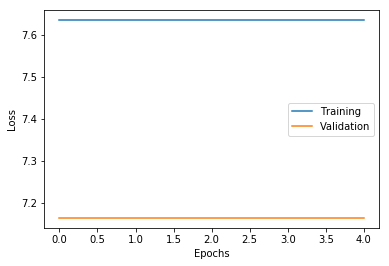

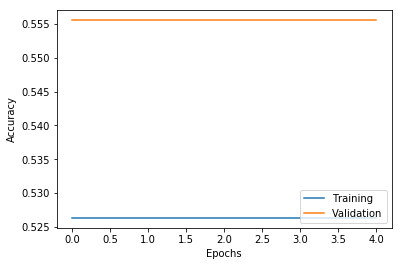

In [35]:
plot_history(hist)

In [87]:
from sklearn.metrics import confusion_matrix,classification_report

def evaluate(X_test, Y_test):
    
    ##Evaluate loss and metrics
    loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test Loss:', loss)
    print('Test Accuracy:', accuracy)
    # Predict the values from the test dataset
    Y_pred = model.predict(X_test)
    # Convert predictions classes to one hot vectors 
    Y_cls = np.argmax(Y_pred, axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(Y_test, axis = 1) 
    print('Classification Report:\n', classification_report(Y_true,Y_cls))
    
    ## Plot 0 probability
    label=0
    Y_pred_prob = Y_pred[:,label]
    plt.hist(Y_pred_prob[Y_true == label], alpha=0.5, color='red', bins=10, log = True)
    plt.hist(Y_pred_prob[Y_true != label], alpha=0.5, color='blue', bins=10, log = True)
    plt.legend(['digit == 0', 'digit != 0'], loc='upper right')
    plt.xlabel('Probability of being 0')
    plt.ylabel('Number of entries')
    plt.show()
    
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_cls) 
    # plot the confusion matrix
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(confusion_mtx, classes = range(4))

    #Plot largest errors
    errors = (Y_cls - Y_true != 0)
    Y_cls_errors = Y_cls[errors]
    Y_pred_errors = Y_pred[errors]
    Y_true_errors = Y_true[errors]
    X_test_errors = X_test[errors]
    # Probabilities of the wrong predicted numbers
    Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
    # Predicted probabilities of the true values in the error set
    true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
    # Difference between the probability of the predicted label and the true label
    delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
    # Sorted list of the delta prob errors
    sorted_dela_errors = np.argsort(delta_pred_true_errors)
    # Top 6 errors 
    most_important_errors = sorted_dela_errors[-6:]
    # Show the top 6 errors
    display_errors(most_important_errors, X_test_errors, Y_cls_errors, Y_true_errors)
    
    ##Plot predictions
    slice = 15
    predicted = model.predict(X_test[:slice]).argmax(-1)
    plt.figure(figsize=(16,8))
    for i in range(slice):
        plt.subplot(1, slice, i+1)
        plt.imshow(X_test[i].reshape(24,24), interpolation='nearest')
        plt.text(0, 0, predicted[i], color='black', 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

Test Loss: 1.41434216419053
Test Accuracy: 0.24579124579124578
Classification Report:
              precision    recall  f1-score   support

          0       0.26      0.26      0.26       628
          1       0.24      0.27      0.25       559
          2       0.24      0.19      0.21       596
          3       0.24      0.25      0.25       593

avg / total       0.25      0.25      0.24      2376



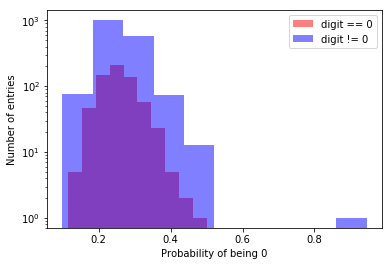

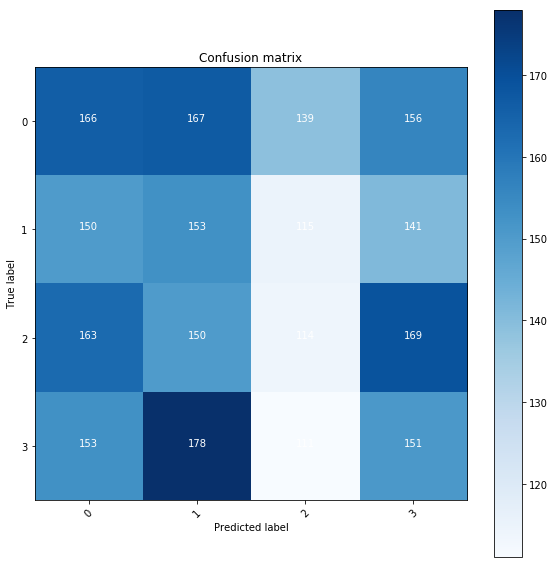

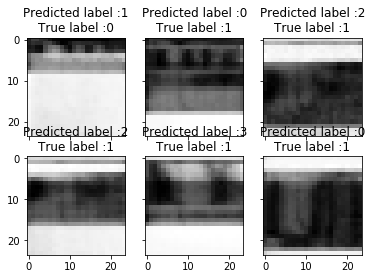

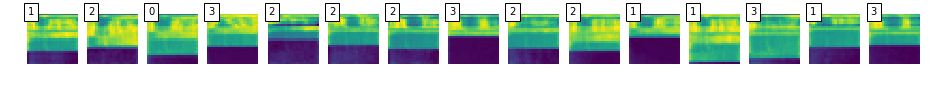

In [88]:
evaluate(X_test, Y_test)

In [73]:
from sklearn.model_selection import GridSearchCV
dense_size_candidates = [[32]]
optimizer = ['Adam']
activation = ['relu', 'tanh']

param_grid={'dense_layer_sizes': dense_size_candidates,
            'dense_activation' : activation,
             'filters': [4, 8],
             'kernel_size': [3, 8],
             'pool_size': [10, 15],
             'padding_type' : ['valid'],
             'stride_size'  : [1],
             'dropout_rate' : [0.5],
             'optimizer' : optimizer,
             # epochs and batch_size are avail for tuning even when not
             # an argument to model building function
             'epochs': [15],
             'batch_size': [256]
              }

In [74]:
from keras.callbacks import ModelCheckpoint

filepath = "best_cnn.hdf5"
checkpoint = ModelCheckpoint(filepath,
                             monitor='acc',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier

def make_model(dense_layer_sizes, dense_activation, filters, 
               kernel_size, pool_size, padding_type, stride_size, dropout_rate, optimizer):
    '''Creates model comprised of 2 convolutional layers followed by dense layers

    dense_layer_sizes: List of layer sizes. This list has one number for each layer
    dense_activation: activation funciton in dense layer
    filters: Number of convolutional filters in each convolutional layer
    kernel_size: Convolutional kernel size
    pool_size: Size of pooling area for max pooling
    padding_type: type of padding: same or valid
    stride_size: symmetric stride size
    dropout_rate: dropout rate
    optimizer: optimizer used for mimizing
    '''

    model = Sequential()
    
    model.add(Conv2D(filters, (kernel_size, kernel_size), padding=padding_type, 
                     strides=(stride_size, stride_size), activation='relu', input_shape=shape_ord))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    for layer_size in dense_layer_sizes:
        model.add(Dense(layer_size, activation=dense_activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

    return model

In [76]:
my_cnn = KerasClassifier(make_model)
grid = GridSearchCV(my_cnn,
                    param_grid,
                    cv=2,
                    scoring='average_precision',
                    n_jobs=1)
grid_result = grid.fit(X_train, Y_train, callbacks=[checkpoint])

Epoch 1/15
1940/1940 [==============================] - 1s 285us/step - loss: 1.4444 - acc: 0.2624

Epoch 00001: acc improved from -inf to 0.26237, saving model to best_cnn.hdf5
Epoch 2/15
1940/1940 [==============================] - 0s 103us/step - loss: 1.4353 - acc: 0.2443

Epoch 00002: acc did not improve from 0.26237
Epoch 3/15
1940/1940 [==============================] - 0s 107us/step - loss: 1.4269 - acc: 0.2418

Epoch 00003: acc did not improve from 0.26237
Epoch 4/15
1940/1940 [==============================] - 0s 120us/step - loss: 1.4127 - acc: 0.2474

Epoch 00004: acc did not improve from 0.26237
Epoch 5/15
1940/1940 [==============================] - 0s 119us/step - loss: 1.4081 - acc: 0.2629

Epoch 00005: acc improved from 0.26237 to 0.26289, saving model to best_cnn.hdf5
Epoch 6/15
1940/1940 [==============================] - 0s 108us/step - loss: 1.3958 - acc: 0.2541

Epoch 00006: acc did not improve from 0.26289
Epoch 7/15
1940/1940 [==============================] - 0

1940/1940 [==============================] - 0s 101us/step - loss: 1.3871 - acc: 0.2536

Epoch 00011: acc did not improve from 0.27732
Epoch 12/15
1940/1940 [==============================] - 0s 98us/step - loss: 1.3864 - acc: 0.2562

Epoch 00012: acc did not improve from 0.27732
Epoch 13/15
1940/1940 [==============================] - 0s 99us/step - loss: 1.3863 - acc: 0.2495

Epoch 00013: acc did not improve from 0.27732
Epoch 14/15
1940/1940 [==============================] - 0s 99us/step - loss: 1.3869 - acc: 0.2665

Epoch 00014: acc did not improve from 0.27732
Epoch 15/15
1940/1940 [==============================] - 0s 107us/step - loss: 1.3859 - acc: 0.2598

Epoch 00015: acc did not improve from 0.27732
Epoch 1/15
1940/1940 [==============================] - 1s 399us/step - loss: 1.3878 - acc: 0.2649

Epoch 00001: acc did not improve from 0.27732
Epoch 2/15
1940/1940 [==============================] - 0s 158us/step - loss: 1.3867 - acc: 0.2557

Epoch 00002: acc did not improve f

1940/1940 [==============================] - 0s 160us/step - loss: 1.3857 - acc: 0.2418

Epoch 00007: acc did not improve from 0.27732
Epoch 8/15
1940/1940 [==============================] - 0s 148us/step - loss: 1.3850 - acc: 0.2675

Epoch 00008: acc did not improve from 0.27732
Epoch 9/15
1940/1940 [==============================] - 0s 144us/step - loss: 1.3865 - acc: 0.2572

Epoch 00009: acc did not improve from 0.27732
Epoch 10/15
1940/1940 [==============================] - 0s 147us/step - loss: 1.3850 - acc: 0.2809

Epoch 00010: acc improved from 0.27732 to 0.28093, saving model to best_cnn.hdf5
Epoch 11/15
1940/1940 [==============================] - 0s 150us/step - loss: 1.3849 - acc: 0.2649

Epoch 00011: acc did not improve from 0.28093
Epoch 12/15
1940/1940 [==============================] - 0s 151us/step - loss: 1.3855 - acc: 0.2613

Epoch 00012: acc did not improve from 0.28093
Epoch 13/15
1940/1940 [==============================] - 0s 149us/step - loss: 1.3846 - acc: 0.26

1940/1940 [==============================] - 0s 127us/step - loss: 1.3966 - acc: 0.2577

Epoch 00003: acc did not improve from 0.28093
Epoch 4/15
1940/1940 [==============================] - 0s 106us/step - loss: 1.3906 - acc: 0.2510

Epoch 00004: acc did not improve from 0.28093
Epoch 5/15
1940/1940 [==============================] - 0s 139us/step - loss: 1.3918 - acc: 0.2454

Epoch 00005: acc did not improve from 0.28093
Epoch 6/15
1940/1940 [==============================] - 0s 109us/step - loss: 1.3884 - acc: 0.2521

Epoch 00006: acc did not improve from 0.28093
Epoch 7/15
1940/1940 [==============================] - 0s 147us/step - loss: 1.3864 - acc: 0.2644

Epoch 00007: acc did not improve from 0.28093
Epoch 8/15
1940/1940 [==============================] - 0s 108us/step - loss: 1.3896 - acc: 0.2412

Epoch 00008: acc did not improve from 0.28093
Epoch 9/15
1940/1940 [==============================] - 0s 108us/step - loss: 1.3869 - acc: 0.2521

Epoch 00009: acc did not improve fr

1940/1940 [==============================] - 0s 152us/step - loss: 1.3857 - acc: 0.2603

Epoch 00014: acc did not improve from 0.28093
Epoch 15/15
1940/1940 [==============================] - 0s 149us/step - loss: 1.3858 - acc: 0.2639

Epoch 00015: acc did not improve from 0.28093
Epoch 1/15
1940/1940 [==============================] - 1s 657us/step - loss: 1.4142 - acc: 0.2515

Epoch 00001: acc did not improve from 0.28093
Epoch 2/15
1940/1940 [==============================] - 0s 154us/step - loss: 1.3891 - acc: 0.2619

Epoch 00002: acc did not improve from 0.28093
Epoch 3/15
1940/1940 [==============================] - 0s 155us/step - loss: 1.3861 - acc: 0.2644

Epoch 00003: acc did not improve from 0.28093
Epoch 4/15
1940/1940 [==============================] - 0s 156us/step - loss: 1.3870 - acc: 0.2598

Epoch 00004: acc did not improve from 0.28093
Epoch 5/15
1940/1940 [==============================] - 0s 159us/step - loss: 1.3860 - acc: 0.2696

Epoch 00005: acc did not improve f

1940/1940 [==============================] - 0s 102us/step - loss: 1.3867 - acc: 0.2582

Epoch 00010: acc did not improve from 0.28093
Epoch 11/15
1940/1940 [==============================] - 0s 125us/step - loss: 1.3871 - acc: 0.2644

Epoch 00011: acc did not improve from 0.28093
Epoch 12/15
1940/1940 [==============================] - 0s 115us/step - loss: 1.3869 - acc: 0.2562

Epoch 00012: acc did not improve from 0.28093
Epoch 13/15
1940/1940 [==============================] - 0s 98us/step - loss: 1.3863 - acc: 0.2696

Epoch 00013: acc did not improve from 0.28093
Epoch 14/15
1940/1940 [==============================] - 0s 98us/step - loss: 1.3857 - acc: 0.2531

Epoch 00014: acc did not improve from 0.28093
Epoch 15/15
1940/1940 [==============================] - 0s 99us/step - loss: 1.3856 - acc: 0.2588

Epoch 00015: acc did not improve from 0.28093
Epoch 1/15
1940/1940 [==============================] - 1s 606us/step - loss: 1.4678 - acc: 0.2325

Epoch 00001: acc did not improve 

1940/1940 [==============================] - 0s 117us/step - loss: 1.3974 - acc: 0.2557

Epoch 00002: acc did not improve from 0.28196
Epoch 3/15
1940/1940 [==============================] - 0s 112us/step - loss: 1.3912 - acc: 0.2716

Epoch 00003: acc did not improve from 0.28196
Epoch 4/15
1940/1940 [==============================] - 0s 135us/step - loss: 1.3920 - acc: 0.2402

Epoch 00004: acc did not improve from 0.28196
Epoch 5/15
1940/1940 [==============================] - 0s 137us/step - loss: 1.3829 - acc: 0.2820

Epoch 00005: acc improved from 0.28196 to 0.28196, saving model to best_cnn.hdf5
Epoch 6/15
1940/1940 [==============================] - 0s 123us/step - loss: 1.3875 - acc: 0.2613

Epoch 00006: acc did not improve from 0.28196
Epoch 7/15
1940/1940 [==============================] - 0s 127us/step - loss: 1.3871 - acc: 0.2593

Epoch 00007: acc did not improve from 0.28196
Epoch 8/15
1940/1940 [==============================] - 0s 115us/step - loss: 1.3879 - acc: 0.2392



1940/1940 [==============================] - 0s 152us/step - loss: 1.3854 - acc: 0.2634

Epoch 00013: acc did not improve from 0.28196
Epoch 14/15
1940/1940 [==============================] - 0s 172us/step - loss: 1.3853 - acc: 0.2629

Epoch 00014: acc did not improve from 0.28196
Epoch 15/15
1940/1940 [==============================] - 0s 207us/step - loss: 1.3852 - acc: 0.2634

Epoch 00015: acc did not improve from 0.28196
Epoch 1/15
1940/1940 [==============================] - 2s 984us/step - loss: 1.4242 - acc: 0.2546

Epoch 00001: acc did not improve from 0.28196
Epoch 2/15
1940/1940 [==============================] - 0s 166us/step - loss: 1.3908 - acc: 0.2613

Epoch 00002: acc did not improve from 0.28196
Epoch 3/15
1940/1940 [==============================] - 0s 157us/step - loss: 1.3872 - acc: 0.2577

Epoch 00003: acc did not improve from 0.28196
Epoch 4/15
1940/1940 [==============================] - 0s 163us/step - loss: 1.3868 - acc: 0.2603

Epoch 00004: acc did not improve 

In [77]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.257879 using {'batch_size': 256, 'dense_activation': 'tanh', 'dense_layer_sizes': [32], 'dropout_rate': 0.5, 'epochs': 15, 'filters': 4, 'kernel_size': 3, 'optimizer': 'Adam', 'padding_type': 'valid', 'pool_size': 10, 'stride_size': 1}
0.248455 (0.001186) with: {'batch_size': 256, 'dense_activation': 'relu', 'dense_layer_sizes': [32], 'dropout_rate': 0.5, 'epochs': 15, 'filters': 4, 'kernel_size': 3, 'optimizer': 'Adam', 'padding_type': 'valid', 'pool_size': 10, 'stride_size': 1}
0.254463 (0.000523) with: {'batch_size': 256, 'dense_activation': 'relu', 'dense_layer_sizes': [32], 'dropout_rate': 0.5, 'epochs': 15, 'filters': 4, 'kernel_size': 3, 'optimizer': 'Adam', 'padding_type': 'valid', 'pool_size': 15, 'stride_size': 1}
0.249564 (0.000814) with: {'batch_size': 256, 'dense_activation': 'relu', 'dense_layer_sizes': [32], 'dropout_rate': 0.5, 'epochs': 15, 'filters': 4, 'kernel_size': 8, 'optimizer': 'Adam', 'padding_type': 'valid', 'pool_size': 10, 'stride_size': 1}
0.254898 